In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Lets see what is in the Data
df=pd.read_csv('../Dataset/Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [6]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
# df.corr().T

In [11]:
# Size of the data 
df.shape

(300153, 11)

In [12]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

<b> Indigo becaming as a most popular Airline

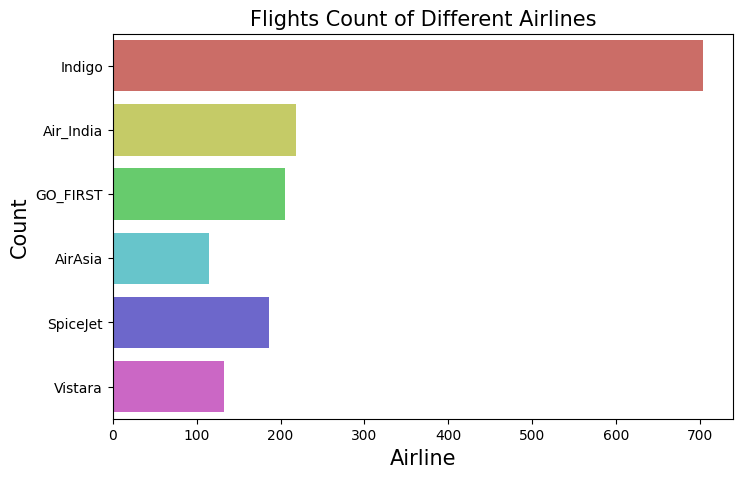

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [14]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

<b> Most of the Airlines has Economic Class as common

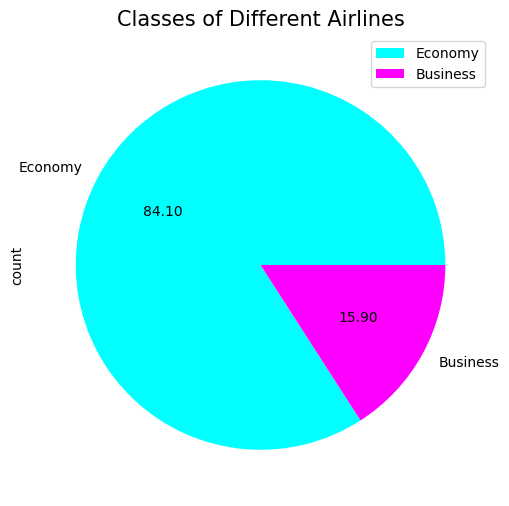

In [15]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

<b> Does price vary with Airlines?</b>

<p>
    
<ul>
    <li>As we can see Vistara has Maximum Price range</li>
    <li>Vistara and Air_India Airlines Have Maximum Price when compared to Others</li>
    <li>SpiceJet , AirAsia , GO_First and Indigo has some what equal prices</li>  
    
</ul>
</p>

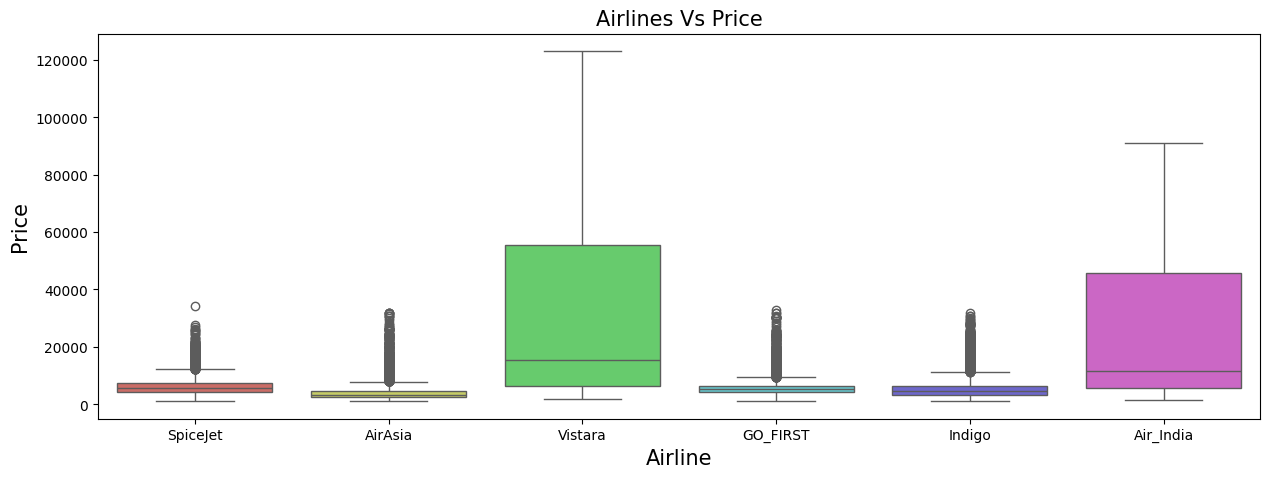

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    <b> How Does the Ticket Price vary between Economy and Business Class?</b>
   
<ul> 
    <li>Ticket Price is Maximum for Bussiness Class When compared to Economy Class</li>
</ul>
    </p>

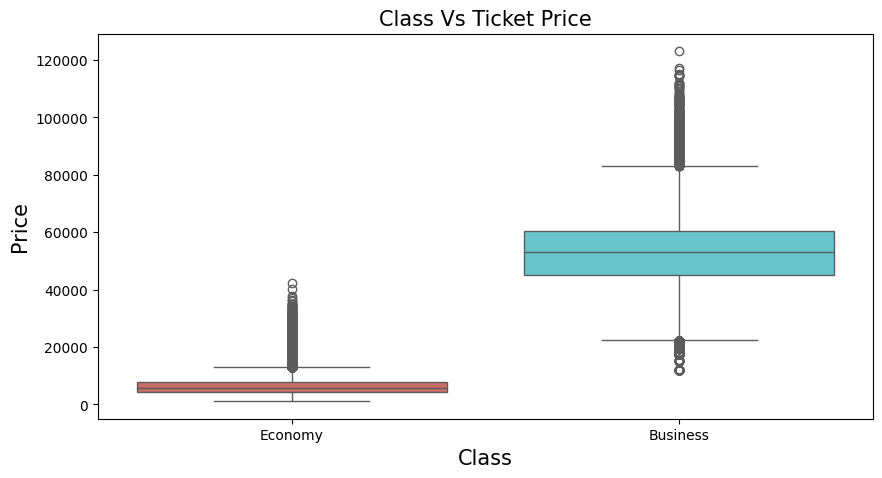

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b> How Does the Ticket Price vary with the number of stops of a Flight?</b>

<p> 
<ul><li>Flights having one stop has maximum ticket price</li></ul>
</p>

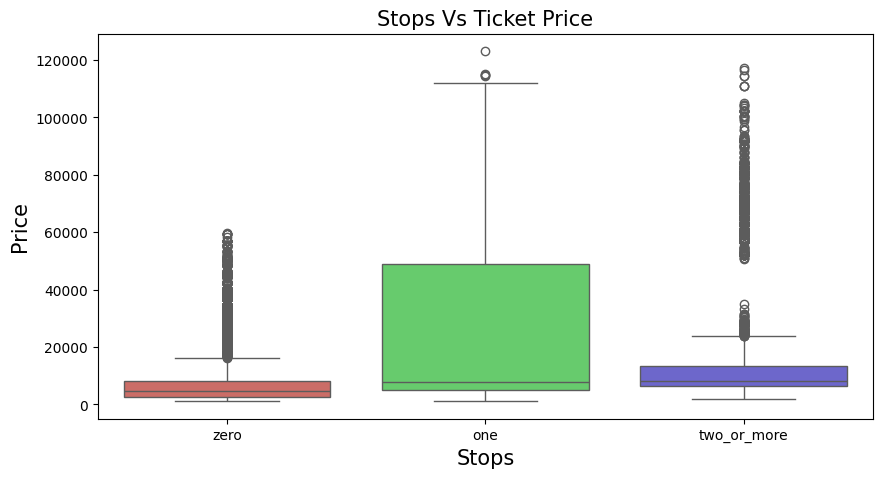

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    
<b> How the Ticket Price change based on the Departure Time and Arrival Time?</b><br>

    
<b>1. Departure Time Vs Ticket Price</b>

   <ul>
   <li> Ticket Price is More for the Flights when the Departure Time is at Night</li>
   <li>Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening</li>
   <li>Ticket Price is Low for the Flights Having Departure Time at Late_night</li>
   </ul>
    
 
 
<b>2. Arrival Time Vs Ticket Price</b>

   <ul>
    <li>Ticket Price is More for the Flights when the Arrival Time is at Evening</li>
    <li>Ticket Price is almost equal for flights Having Arrival time is at Morning and Night</li>
   <li>Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time</li>
    </ul>
 </p>

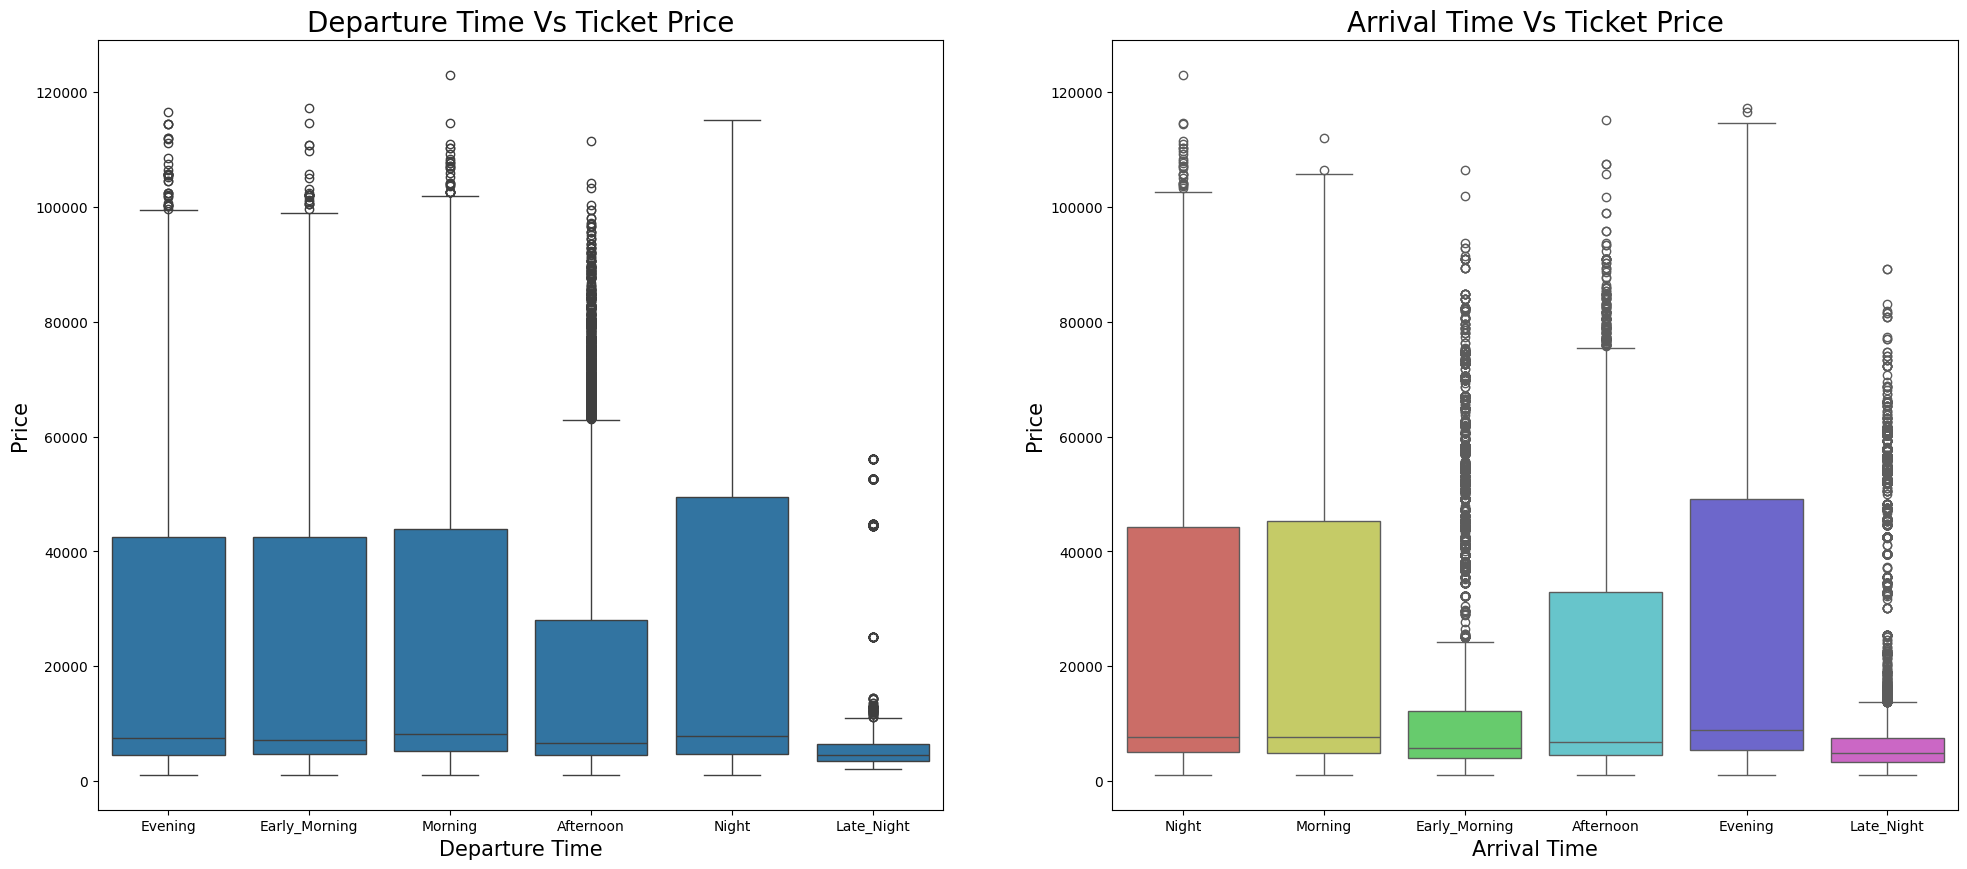

In [19]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
<b> How the price changes with change in Source city and Destination city?</b><br>
    
<b>1. Source City Vs Ticket Price</b>

   <li> Ticket Price is More for the Flights whose Source City is Kolkata</li>
   <li>Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore</li>
    <li> Ticket Price is Low for the Flights Having Source City as Delhi</li>
    
 
<b>2. Destination City Vs Ticket Price</b>

   <li> Ticket Price is More for the Flights whose Destination City is kolkata and Chennai</li>
   <li> Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore</li>
   <li>Ticket Price is Low for the Flights Having Destination City as Delhi</li>
</p>

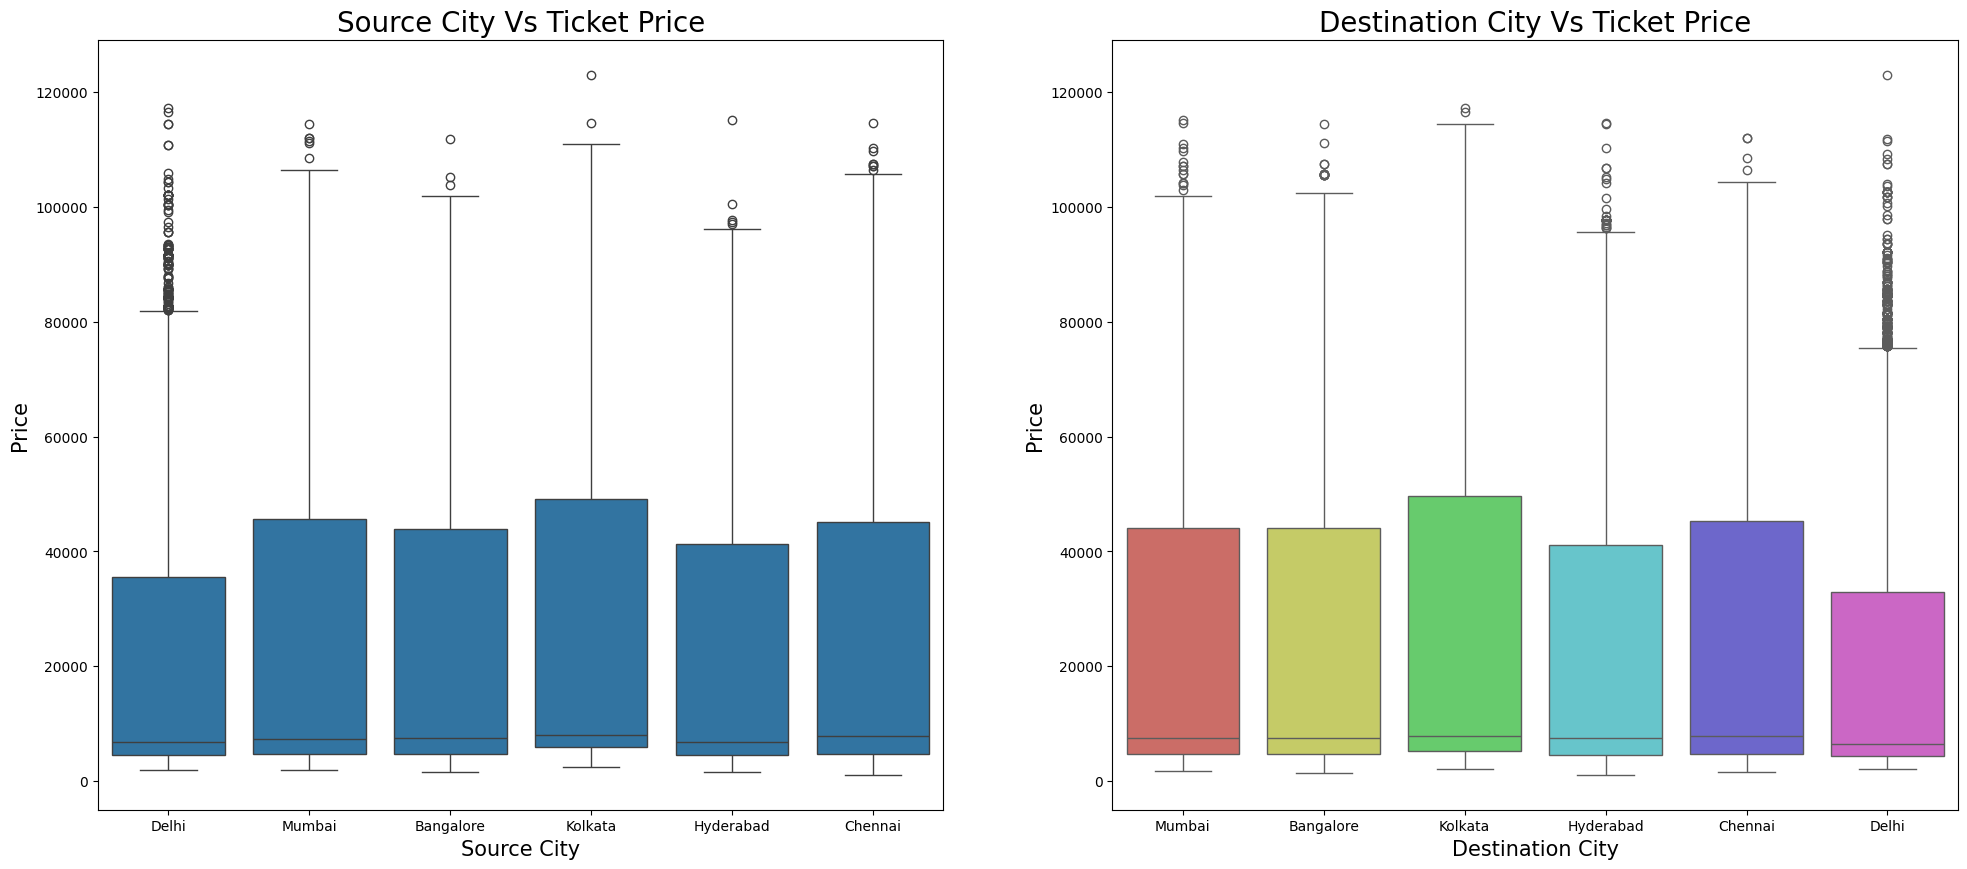

In [20]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    <b> How Price Varies with the Flight Duration Based on Class?</b>

<li> With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes</li>
</p>


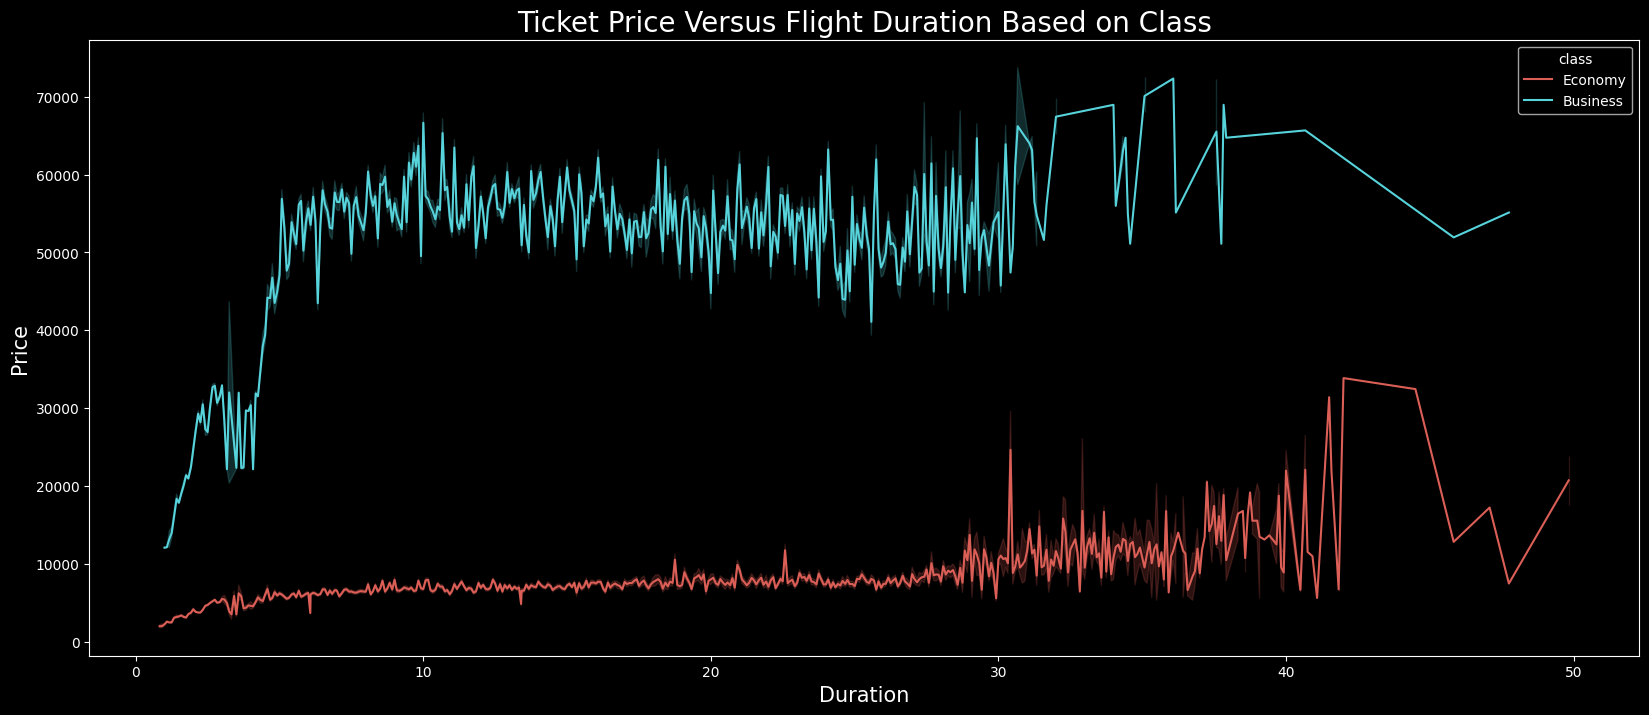

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    <b> How does the price affected on the days left for Departure?</b>
    
<li> As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines</li>
    
</p>

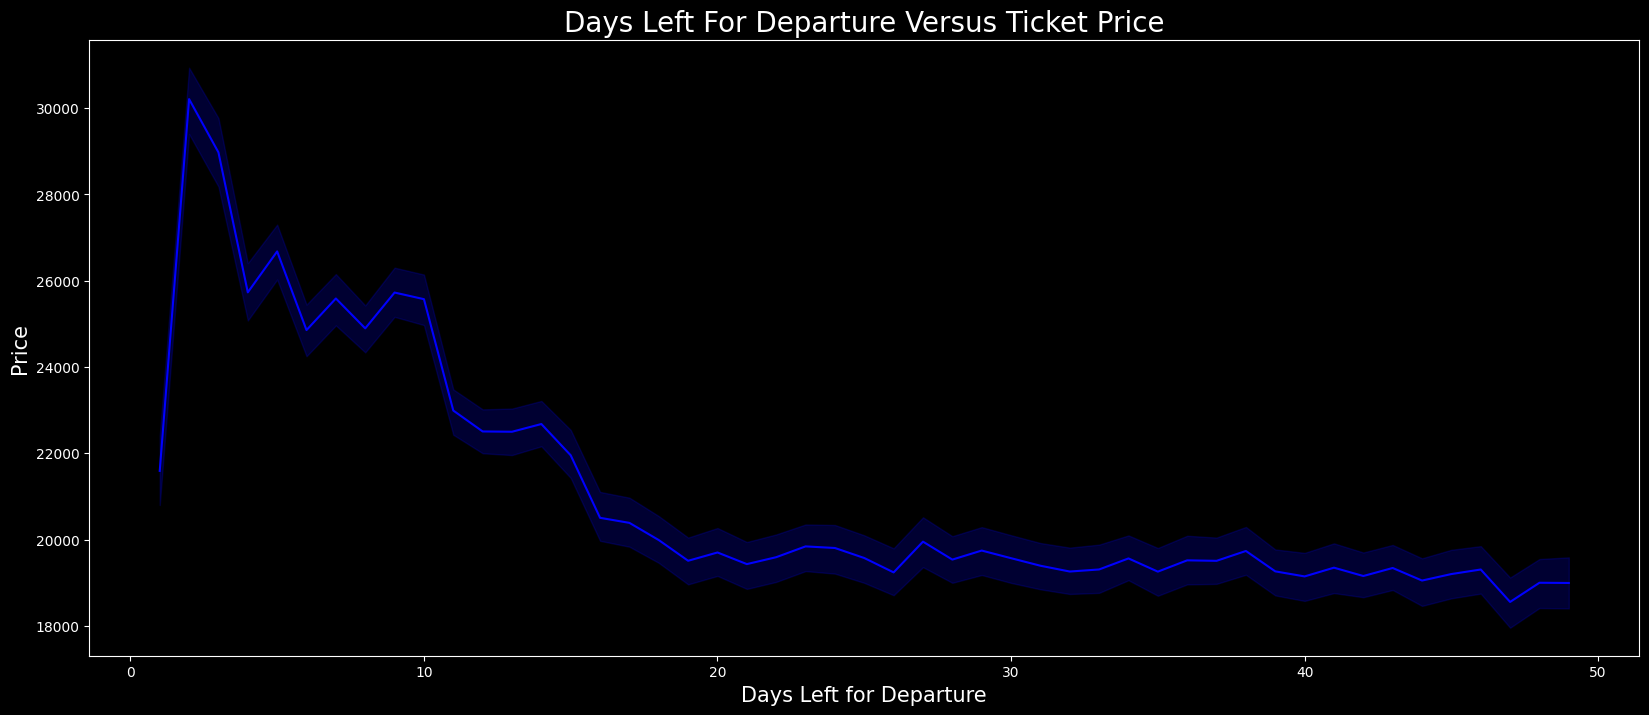

In [22]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

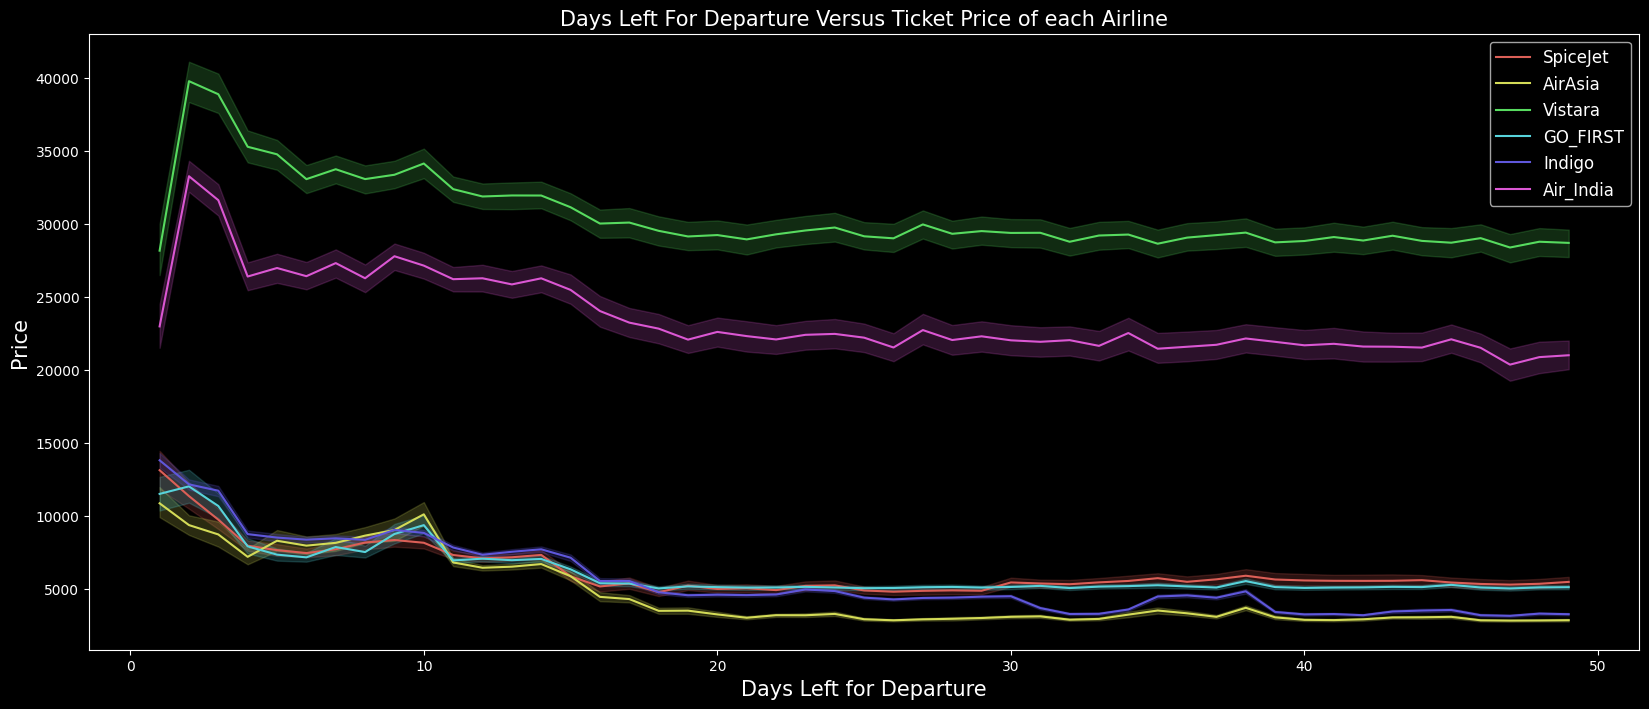

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b> Total number of Flights from one city to another</b>

In [24]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


<b> Average Price of different Airlnes from Source city to Destination city</b>

In [25]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [26]:
# Creating a Back up File
df_bk=df.copy()

In [28]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [29]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

In [30]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [31]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [32]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [36]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1270.753
Mean Squared Error (MSE): 13950015.031
Root Mean Squared Error (RMSE): 3734.972
R2_score: 0.972895
Root Mean Squared Log Error (RMSLE): 8.225
Mean Absolute Percentage Error (MAPE): 8.66 %
Adj R Square:  0.972894
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1170.034
Mean Squared Error (MSE): 8229857.525
Root Mean Squared Error (RMSE): 2868.773
R2_score: 0.984009
Root Mean Squared Log Error (RMSLE): 7.962
Me

In [37]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
1,DecisionTreeRegressor(),1255.215099,0.973595,3686.354397,8.571992,1.358921e+07,8.212393,0.973596
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1171.021440,0.983967,2872.520459,7.904222,8.251374e+06,7.962945,0.983968
3,KNeighborsRegressor(),1854.469527,0.971645,3820.074173,11.113824,1.459297e+07,8.248025,0.971646
4,"(ExtraTreeRegressor(random_state=1936024563), ...",1146.194372,0.984787,2798.053330,7.644586,7.829102e+06,7.936679,0.984788
5,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
6,DecisionTreeRegressor(),1270.752747,0.972894,3734.971892,8.662731,1.395002e+07,8.225496,0.972895
7,"(DecisionTreeRegressor(max_features=1.0, rando...",1170.033509,0.984008,2868.772826,7.922340,8.229858e+06,7.961640,0.984009
8,KNeighborsRegressor(),1854.469527,0.971645,3820.074173,11.113824,1.459297e+07,8.248025,0.971646
9,"(ExtraTreeRegressor(random_state=957529194), E...",1140.893811,0.984804,2796.532698,7.599900,7.820595e+06,7.936136,0.984805


In [38]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,Lasso Regression,0.984804,1140.893811,2796.532698,7.599900,7.820595e+06,7.936136,0.984805
1,ExtraTreesRegressor,0.984787,1146.194372,2798.053330,7.644586,7.829102e+06,7.936679,0.984788
2,BaggingRegressor,0.984008,1170.033509,2868.772826,7.922340,8.229858e+06,7.961640,0.984009
3,RandomForestRegressor,0.983967,1171.021440,2872.520459,7.904222,8.251374e+06,7.962945,0.983968
4,DecisionTreeRegressor,0.973595,1255.215099,3686.354397,8.571992,1.358921e+07,8.212393,0.973596
5,XGBRegressor,0.972894,1270.752747,3734.971892,8.662731,1.395002e+07,8.225496,0.972895
6,Ridge Regression,0.971645,1854.469527,3820.074173,11.113824,1.459297e+07,8.248025,0.971646
7,KNeighborsRegressor,0.971645,1854.469527,3820.074173,11.113824,1.459297e+07,8.248025,0.971646
8,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
9,GradientBoostingRegressor,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656


<p> From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are<br>
    
1. <b>ExtraTreesRegressor</b>
2. <b>RandomForestRegressor</b>
3. <b>Bagging Regressor</b><br>

<p>Training the Data with <b>ExtraTreesRegressor</b></p>
</p>

In [44]:
#Trainig the model with
modelETR.fit(x_train, y_train)

ExtraTreesRegressor()

In [45]:
import joblib
joblib_file = "flight_price_model.pkl"
joblib.dump(modelETR, joblib_file)

['flight_price_model.pkl']

In [46]:
# Predict the model with test data
y_pred = modelETR.predict(x_test)

In [40]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [41]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
243605,Air_India,AI-888,Mumbai,Evening,one,Morning,Chennai,Business,13.92,31,57554,57554,50327.690
262733,Air_India,AI-573,Kolkata,Evening,one,Morning,Delhi,Business,14.67,27,57939,57939,57436.660
70713,Vistara,UK-944,Mumbai,Afternoon,one,Morning,Hyderabad,Economy,18.42,4,15014,15014,10033.490
29075,Vistara,UK-813,Delhi,Evening,one,Morning,Hyderabad,Economy,15.50,4,11310,11310,12065.390
216445,Air_India,AI-423,Delhi,Early_Morning,two_or_more,Afternoon,Kolkata,Business,7.67,11,27976,27976,29406.470
91293,Vistara,UK-893,Bangalore,Evening,one,Afternoon,Delhi,Economy,19.75,37,3811,3811,3392.500
59594,AirAsia,I5-767,Mumbai,Early_Morning,one,Night,Bangalore,Economy,16.25,39,3175,3175,3660.480
135888,Air_India,AI-424,Kolkata,Afternoon,one,Afternoon,Bangalore,Economy,22.75,4,12792,12792,16777.645
177213,Vistara,UK-878,Hyderabad,Afternoon,one,Night,Chennai,Economy,9.83,13,15204,15204,8698.580
196930,Air_India,AI-672,Chennai,Evening,one,Morning,Bangalore,Economy,19.08,40,3584,3584,3876.470


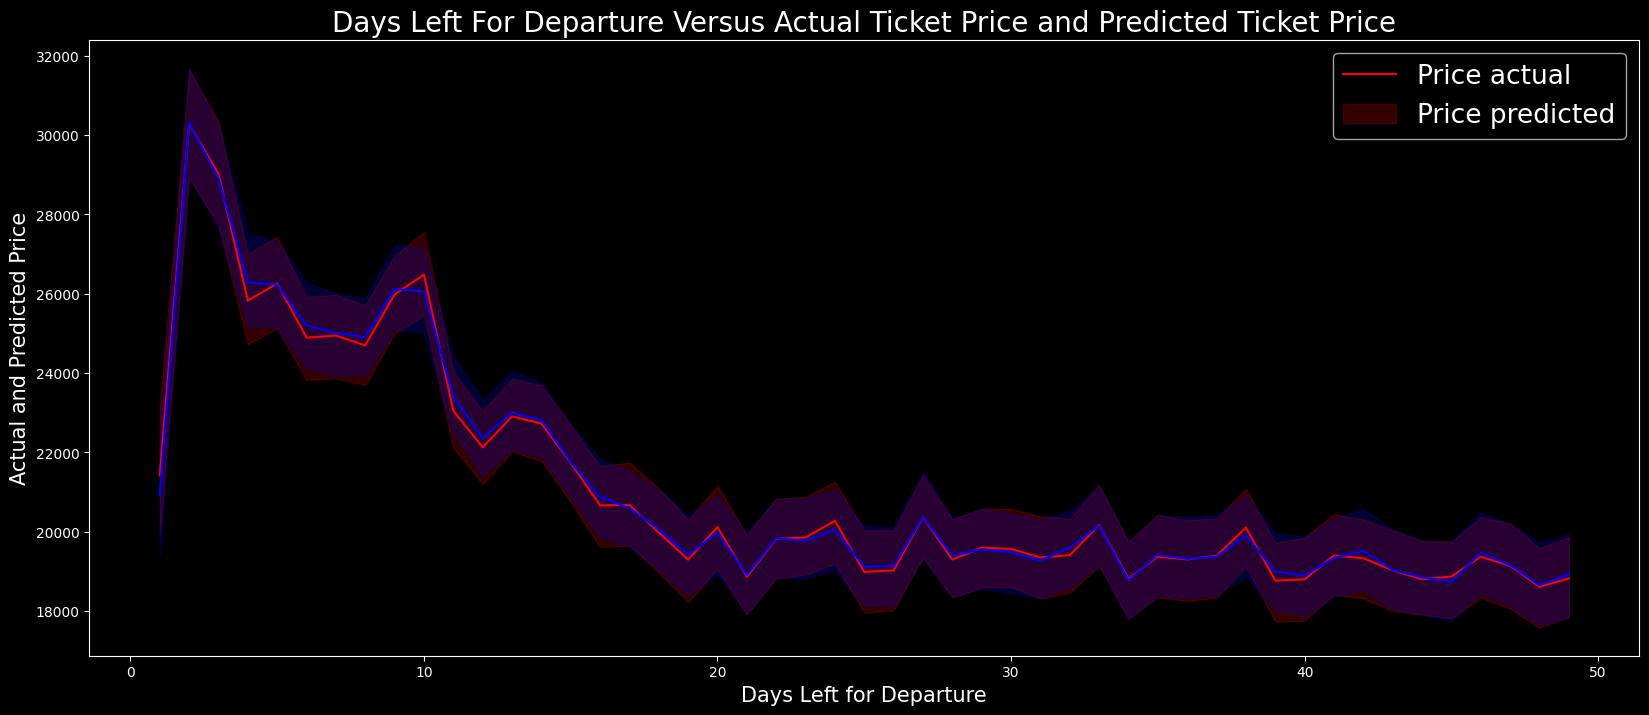

In [42]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

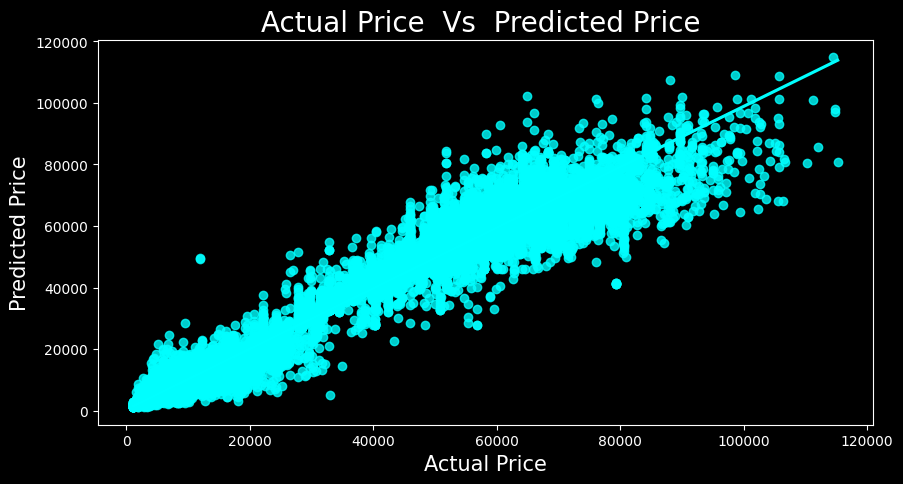

In [43]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()